In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [3]:
data = pd.read_csv('../Backup/alunosEnsinoMedio.csv', sep=';', encoding='utf-8')


In [4]:
data.head()

,PK_COD_ALUNO,TP_SEXO,TP_NACIONALIDADE,TP_COR_RACA,TP_DEPENDENCIA,cursou_ensinomedio
0,118639857600,F,Brasileira,Branca,Privada,1
1,118634206490,M,Brasileira,Branca,Privada,1
2,118537603740,F,Brasileira,Não declarada,Estadual,1
3,118633674709,M,Brasileira,Branca,Federal,1
4,118660830236,M,Brasileira,Parda,Estadual,1


In [5]:
data.shape
data.describe()

,PK_COD_ALUNO,cursou_ensinomedio
count,9.514315e+06,9.514315e+06
mean,1.144935e+11,8.900227e-01
std,3.038126e+09,3.128615e-01
min,1.100002e+11,0.000000e+00
25%,1.119484e+11,1.000000e+00
50%,1.138455e+11,1.000000e+00
75%,1.183838e+11,1.000000e+00
max,1.263795e+11,1.000000e+00


In [6]:
data.dtypes

PK_COD_ALUNO           int64
TP_SEXO               object
TP_NACIONALIDADE      object
TP_COR_RACA           object
TP_DEPENDENCIA        object
cursou_ensinomedio     int64
dtype: object

In [7]:
x = data[['TP_SEXO','TP_NACIONALIDADE', 'TP_COR_RACA','TP_DEPENDENCIA']]

In [8]:
x = pd.get_dummies(data=x, drop_first=True)
x.head()

,TP_SEXO_M,TP_NACIONALIDADE_Brasileira -nascido no exterior ou naturalizado,TP_NACIONALIDADE_Estrangeira,TP_COR_RACA_Branca,TP_COR_RACA_Indígena,TP_COR_RACA_Não declarada,TP_COR_RACA_Parda,TP_COR_RACA_Preta,TP_DEPENDENCIA_Federal,TP_DEPENDENCIA_Municipal,TP_DEPENDENCIA_Privada
0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0


In [9]:
x.corr()

,TP_SEXO_M,TP_NACIONALIDADE_Brasileira -nascido no exterior ou naturalizado,TP_NACIONALIDADE_Estrangeira,TP_COR_RACA_Branca,TP_COR_RACA_Indígena,TP_COR_RACA_Não declarada,TP_COR_RACA_Parda,TP_COR_RACA_Preta,TP_DEPENDENCIA_Federal,TP_DEPENDENCIA_Municipal,TP_DEPENDENCIA_Privada
TP_SEXO_M,1.000000,-0.000063,0.000306,-0.011607,-0.001475,0.008674,0.000691,0.007485,0.007908,0.004840,-0.005400
TP_NACIONALIDADE_Brasileira -nascido no exterior ou naturalizado,-0.000063,1.000000,-0.000906,0.002233,0.000465,-0.003213,-0.006050,-0.001929,0.004842,-0.007121,0.017579
TP_NACIONALIDADE_Estrangeira,0.000306,-0.000906,1.000000,-0.007573,0.062691,-0.008647,-0.006174,-0.005886,0.001218,-0.011096,0.026729
TP_COR_RACA_Branca,-0.011607,0.002233,-0.007573,1.000000,-0.043836,-0.587470,-0.430009,-0.153648,0.004233,0.008692,0.156464
TP_COR_RACA_Indígena,-0.001475,0.000465,0.062691,-0.043836,1.000000,-0.037978,-0.027799,-0.009933,0.000749,0.002745,-0.004149
TP_COR_RACA_Não declarada,0.008674,-0.003213,-0.008647,-0.587470,-0.037978,1.000000,-0.372552,-0.133118,-0.003692,-0.122337,0.009153
TP_COR_RACA_Parda,0.000691,-0.006050,-0.006174,-0.430009,-0.027799,-0.372552,1.000000,-0.097438,-0.003786,0.118149,-0.187384
TP_COR_RACA_Preta,0.007485,-0.001929,-0.005886,-0.153648,-0.009933,-0.133118,-0.097438,1.000000,-0.000881,0.035606,-0.058645
TP_DEPENDENCIA_Federal,0.007908,0.004842,0.001218,0.004233,0.000749,-0.003692,-0.003786,-0.000881,1.000000,-0.011088,-0.010316
TP_DEPENDENCIA_Municipal,0.004840,-0.007121,-0.011096,0.008692,0.002745,-0.122337,0.118149,0.035606,-0.011088,1.000000,-0.256072


In [10]:
y = data.cursou_ensinomedio

In [11]:
model = LogisticRegression(solver='liblinear', random_state=0)


In [12]:
clf = model.fit(x, y)


In [13]:
model.classes_

array([0, 1], dtype=int64)

In [14]:
model.intercept_

array([2.59310799])

In [15]:
model.coef_

array([[-0.19221714, -0.29174786, -0.55330989, -0.09961248, -0.33299986,
        -0.31181219, -0.25275082, -0.25995448, -1.02137997, -0.86226078,
         0.36955405]])

In [16]:
model.predict_proba(x)

array([[0.05401068, 0.94598932],
       [0.06471657, 0.93528343],
       [0.09268393, 0.90731607],
       ...,
       [0.09448112, 0.90551888],
       [0.07631543, 0.92368457],
       [0.16366129, 0.83633871]])

In [17]:
 model.predict(x)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
model.score(x, y)

0.8900226658461486

In [19]:
confusion_matrix(y, model.predict(x))

array([[      0, 1046359],
       [      0, 8467956]], dtype=int64)

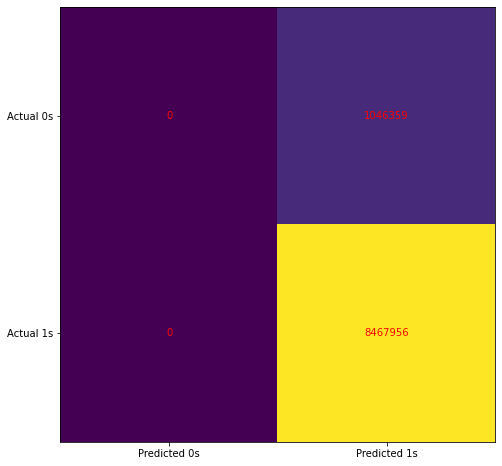

In [20]:
#visualizando a matriz de confusão
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [21]:

l1_ratio = 0.5
model = LogisticRegression(penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01) 
clf = model.fit(x, y)
confusion_matrix(y, model.predict(x))

array([[      0, 1046359],
       [      0, 8467956]], dtype=int64)

C=1.00
Sparsity with L1 penalty:                0.00%
Sparsity with Elastic-Net penalty:       0.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.89
Score with Elastic-Net penalty:          0.89
Score with L2 penalty:                   0.89
C=0.10
Sparsity with L1 penalty:                0.00%
Sparsity with Elastic-Net penalty:       0.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.89
Score with Elastic-Net penalty:          0.89
Score with L2 penalty:                   0.89
C=0.01
Sparsity with L1 penalty:                9.09%
Sparsity with Elastic-Net penalty:       9.09%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.89
Score with Elastic-Net penalty:          0.89
Score with L2 penalty:                   0.89


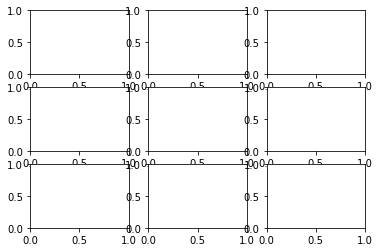

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X = x

l1_ratio = 0.5  

fig, axes = plt.subplots(3, 3)

#regularizando o parametro
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):

    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:",
                                  sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:",
                                 clf_l1_LR.score(X, y)))
    print("{:<40} {:.2f}".format("Score with Elastic-Net penalty:",
                                 clf_en_LR.score(X, y)))
    print("{:<40} {:.2f}".format("Score with L2 penalty:",
                                 clf_l2_LR.score(X, y)))
